In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import praw

reddit = praw.Reddit(client_id='HIuyPRlQtMIsjQ',
                     client_secret='PTekzmZjerluEHt53qnTQgCyINA',
                     user_agent='spfa8301')

In [3]:
headlines = set()


In [4]:
for submission in reddit.subreddit('FiftyShadesofGrey').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

305


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA



In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Fairbairnsj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.6249,
  'headline': 'Fifty Shades of Grey Meets The Walking Dead',
  'neg': 0.374,
  'neu': 0.522,
  'pos': 0.104},
 {'compound': 0.1749,
  'headline': "My wife dragged me to the movie and now I can't stop reading the book.....",
  'neg': 0.08,
  'neu': 0.795,
  'pos': 0.125},
 {'compound': 0.0516,
  'headline': 'Fifty Shades of Grey Song new version',
  'neg': 0.0,
  'neu': 0.833,
  'pos': 0.167}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,-0.6249,Fifty Shades of Grey Meets The Walking Dead,0.374,0.522,0.104
1,0.1749,My wife dragged me to the movie and now I can'...,0.080,0.795,0.125
2,0.0516,Fifty Shades of Grey Song new version,0.000,0.833,0.167
3,0.5423,Stream Fifty Shades of Grey free.,0.000,0.471,0.529
4,0.0516,50 Shades in 50 Seconds - An overview/synopsis...,0.000,0.934,0.066


In [9]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,-0.6249,Fifty Shades of Grey Meets The Walking Dead,0.374,0.522,0.104,-1
1,0.1749,My wife dragged me to the movie and now I can'...,0.080,0.795,0.125,0
2,0.0516,Fifty Shades of Grey Song new version,0.000,0.833,0.167,0
3,0.5423,Stream Fifty Shades of Grey free.,0.000,0.471,0.529,1
4,0.0516,50 Shades in 50 Seconds - An overview/synopsis...,0.000,0.934,0.066,0


In [10]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [11]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Stream Fifty Shades of Grey free.',
 "I'm just gonna leave this here thought you guys would like it.",
 'Fifty Shades of Grey Sale Now On !! Plus Double Reward Points On Every Fifty Shades of Grey Product.',
 'Welcome to the Dungeon: BDSM in the Bible Belt',
 'Fifty Shades Freed Movie Review Plus Interviews With Dakota Johnson and Jamie Dornan']

Negative headlines:

['Fifty Shades of Grey Meets The Walking Dead',
 "Is the abuse that Kim Basinger suffers at the end of Fifty Shades Darker (2017) indicative that she's an actress who will do anything for a paycheck (regardless of how humiliating and degrading it "
 'may be)?',
 'FIFTY SHADES OF GREY Parody Aims to Whip Cancer Into Submission!',
 'Chinese Whippers! - Bizarre censoring of Fifty Shades of Grey',
 'What happens when breaking bad meets 50 shades of grey? THIS!']


In [12]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    179
 1     93
-1     33
Name: label, dtype: int64
 0    58.688525
 1    30.491803
-1    10.819672
Name: label, dtype: float64


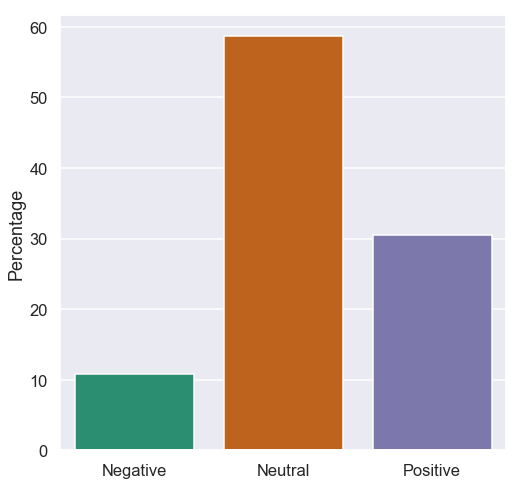

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [14]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [16]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [17]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [18]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('shades', 68),
 ('fifty', 54),
 ('grey', 43),
 ('50', 15),
 ('freed', 13),
 ('like', 11),
 ('love', 9),
 ('movie', 8),
 ('free', 6),
 ('trailer', 6),
 ('darker', 6),
 ('crazy', 6),
 ('review', 4),
 ('dakota', 4),
 ('johnson', 4),
 ('jamie', 4),
 ('dornan', 4),
 ('film', 4),
 ('better', 4),
 ('anyone', 4)]

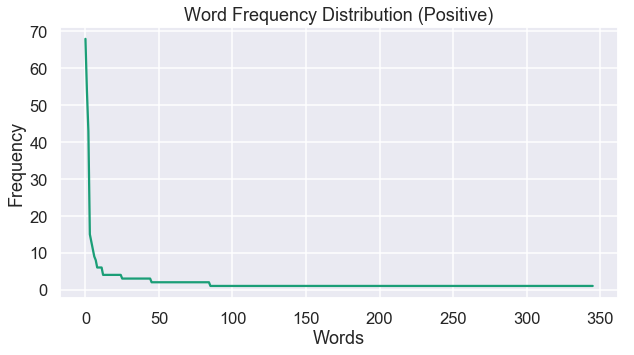

In [19]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

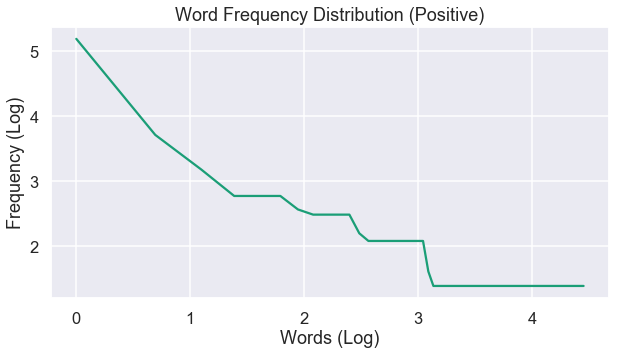

In [20]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('shades', 27),
 ('fifty', 24),
 ('grey', 16),
 ('darker', 4),
 ('50', 4),
 ('hate', 3),
 ('cut', 3),
 ('meets', 2),
 ('bad', 2),
 ('teases', 2),
 ('nsfw', 2),
 ('rape', 2),
 ('claims', 2),
 ('james', 2),
 ('worst', 2),
 ('wrong', 2),
 ('christian', 2),
 ('trailer', 2),
 ('gone', 2),
 ('film', 2)]

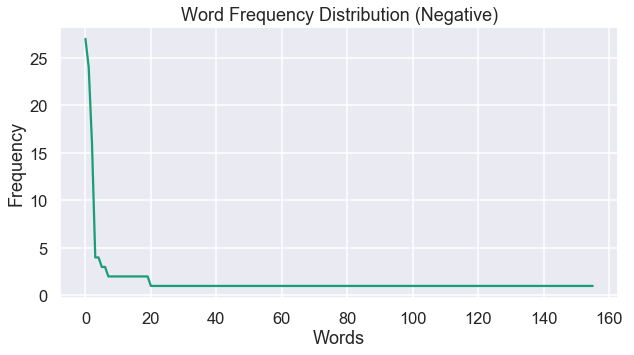

In [22]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

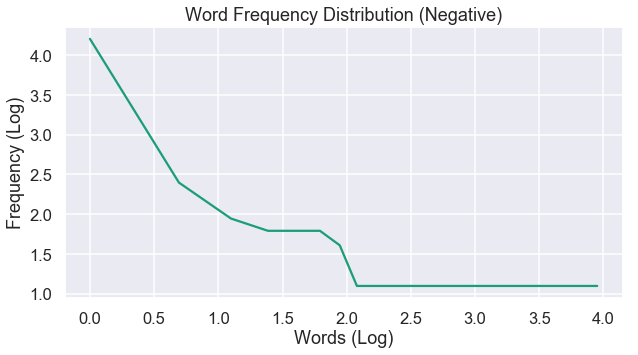

In [23]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()